In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [39]:
data = np.unique(np.random.randint(0, 25, size=(15,2)), axis=0)[:10]
data

array([[ 0,  6],
       [ 7,  5],
       [ 7,  6],
       [ 7, 12],
       [ 8,  3],
       [ 8, 13],
       [ 8, 22],
       [ 9, 10],
       [ 9, 24],
       [12,  4]])

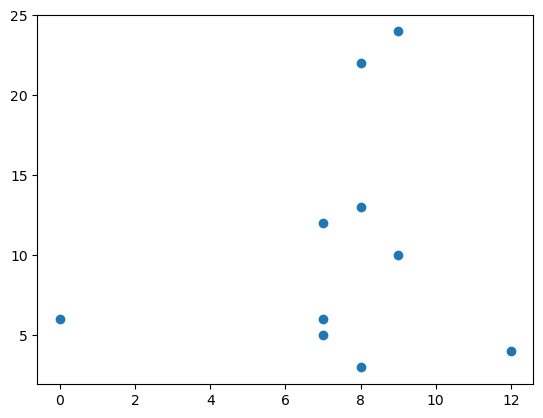

In [40]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [41]:
angle = 0
intercept = 0

In [42]:
def line(angle, intercept):
    if abs(angle) == np.pi / 2:
        return lambda point: point[0]
    else:
        return lambda point: point[1] - np.tan(angle) * point[0] + intercept

In [43]:
def equal_split(data):
    for angle in np.arange(-np.pi / 2, np.pi / 2, 0.01):
        for intercept in range(0, 20):
            this_line = line(angle, intercept)
            vals_pos = np.where(np.apply_along_axis(this_line, 1, data) > 0)[0]
            vals_neg = np.where(np.apply_along_axis(this_line, 1, data) < 0)[0]
            if vals_pos.size == vals_neg.size and vals_pos.size + vals_neg.size == len(data):
                return data[vals_pos], data[vals_neg]

In [44]:
class1, class2 = equal_split(data)
class1, class2

(array([[ 0,  6],
        [ 7, 12],
        [ 8, 13],
        [ 8, 22],
        [ 9, 24]]),
 array([[ 7,  5],
        [ 7,  6],
        [ 8,  3],
        [ 9, 10],
        [12,  4]]))

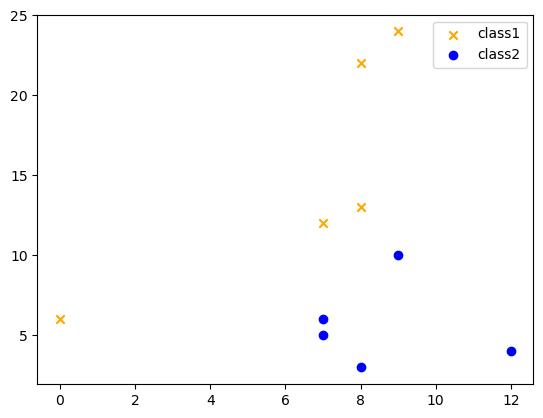

In [45]:
plt.scatter(class1[:, 0], class1[:, 1], marker='x', color='orange', label='class1')
plt.scatter(class2[:, 0], class2[:, 1], marker='o', color='blue',  label='class2')
plt.legend()
plt.show()

In [46]:
class1 = class1.reshape((2, 5))
class2 = class2.reshape((2, 5))
class1, class2

(array([[ 0,  6,  7, 12,  8],
        [13,  8, 22,  9, 24]]),
 array([[ 7,  5,  7,  6,  8],
        [ 3,  9, 10, 12,  4]]))

In [47]:
mean_class1 = np.mean(class1, axis=1)
mean_class2 = np.mean(class2, axis=1)

In [48]:
S1 = np.zeros((2, 2))
S2 = np.zeros((2, 2))

In [49]:
for i in range(5):
    diff = class1[:, i] - mean_class1
    S1 += np.outer(diff, diff)

In [50]:
for i in range(5):
    diff = class2[:, i] - mean_class2
    S2 += np.outer(diff, diff)

In [51]:
Sw = S1 + S2

In [52]:
mean_overall = np.mean(np.concatenate((class1, class2), axis=1), axis=1)
diff_class1 = mean_class1 - mean_overall
diff_class2 = mean_class2 - mean_overall
SB = np.outer(diff_class1, diff_class1) + np.outer(diff_class2, diff_class2)

In [53]:
eigen_values, eigen_vectors = LA.eig(LA.inv(Sw) @ SB)

In [54]:
sorted_indices = np.argsort(eigen_values)[::-1]
sorted_eigen_values = eigen_values[sorted_indices]
sorted_eigen_vectors = eigen_vectors[:, sorted_indices]

In [55]:
k = 1
W = sorted_eigen_vectors[:, :k]

In [56]:
print("Projection matrix W:")
print(W)

Projection matrix W:
[[0.12828444]
 [0.99173742]]


In [57]:
class1_projected = W.T @ class1
class2_projected = W.T @ class2

print("Projected class 1 (1D):")
print(class1_projected)

print("Projected class 2 (1D):")
print(class2_projected)

Projected class 1 (1D):
[[12.89258641  8.70360598 22.71621424 10.46505004 24.82797351]]
Projected class 2 (1D):
[[ 3.87320334  9.56705895 10.81536525 12.67055564  4.9932252 ]]
